### Objective of the project
* Real estate price prediction provides valuable insights and tools for various stakeholders to make better-informed decisions, manage risks, and optimize their investments in real estate. This project is intended to perform statistical analysis on a dataset and develop a predictive model and build a basic dash web application for predicting real estate prices based on the inputs. 

### Steps 
* Gather relevant data from various sources, including real estate databases, government records, online listings, and other public or private sources. 
* Clean and prepare the collected data by handling missing values, removing outliers, and converting categorical variables into numerical representations.
* Create new features or transform existing ones to capture important information that can influence real estate prices. 
* Explore and visualize the data to gain insights into its distribution, correlations, and patterns.
* Choose appropriate machine learninf algorithms or predictive models for the task. 
* Train the selected model on the training data, optimizing its parameters to make accurate predictions. 
* create an end-to-end solution for the machine learning model by using the dash framework

### Brief overview of the columns in the dataset
1. Transaction date - The date of the real estate transaction
2. House age - Age of the house in years
3. Distance to the nearest MRT station - Distance to the nearest Mass Rapid Transit Station in meters
4. Number of convenience stores - number of convenience stores in the vicinity
5. Latitude - Latitude of the property location
6. Longitude - Longitude of the property location
7. House price of unit area - House price of unit area

In [1]:
#necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# loading the dataset using pandas
real_estate_data = pd.read_csv("/Users/binitachhetri/Desktop/DataScience/Real_Estate.csv")

# using .head() method to display the first few rows of the dataset 
real_estate_data_head = real_estate_data.head()

# using .info() method on the dataset to understand the composition of the dataset. 
data_info = real_estate_data.info()

print(real_estate_data_head)
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB
             Transaction date  House age  Distance to the nearest MRT station  \
0  2012-09-02 16:42:30.519336       13.3                            4082.0150   
1  2012-09-04 22:52:29.919544       35.5                             274.0144

In [3]:
# checking if the data contains any null values or not, using sum() method to see the total entries 
#wth null value for each attribute
print(real_estate_data.isnull().sum())

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64


######  As we can see that there are no null values we will go ahead and take a took at the descriptive statistics of the dataset

In [4]:
## Descriptive statistics
descriptive_stats = real_estate_data.describe()
print(descriptive_stats)

        House age  Distance to the nearest MRT station  \
count  414.000000                           414.000000   
mean    18.405072                          1064.468233   
std     11.757670                          1196.749385   
min      0.000000                            23.382840   
25%      9.900000                           289.324800   
50%     16.450000                           506.114400   
75%     30.375000                          1454.279000   
max     42.700000                          6306.153000   

       Number of convenience stores    Latitude   Longitude  \
count                    414.000000  414.000000  414.000000   
mean                       4.265700   24.973605  121.520268   
std                        2.880498    0.024178    0.026989   
min                        0.000000   24.932075  121.473888   
25%                        2.000000   24.952422  121.496866   
50%                        5.000000   24.974353  121.520912   
75%                        6.750000 

#### creating the histogram of the numerical features
* KDE is a non parametric way to estimate the probability density function, PDF of a continuous rabdom variable. 
* It provides a visual representation of the PDF of the data points and is useful for understanding the shape of the distribution. 


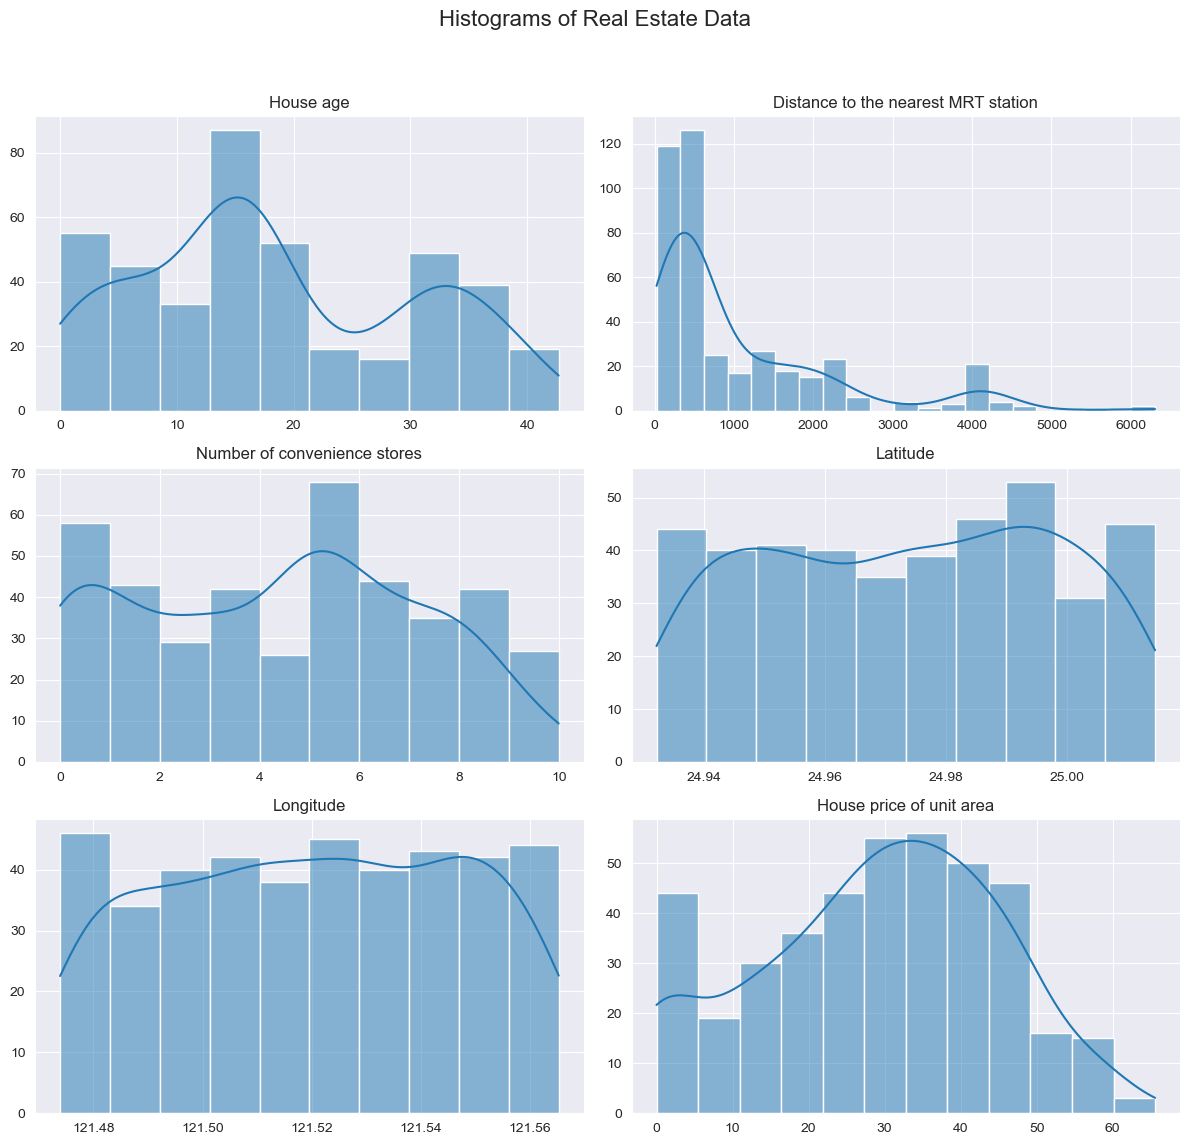

In [5]:
## setting the aesthetic style of the plots
sns.set_style("darkgrid")

#creating histograms for the numerical columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,12))
fig.suptitle("Histograms of Real Estate Data", fontsize = 16)

cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude', 'House price of unit area']

#enumerate() function allows us to iterate through the elements of the list while simultaneously keeping track of 
#the index of each element

for i, col in enumerate(cols):
    sns.histplot(real_estate_data[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Insights gained from histograms above
1. House Age - This shows a relatively uniform distribution with a slight increase in the number of newer properties (lower age)
2. Distance to the nearest MRT station - Most properties are located close to an MRT station, as indicated by the high frequency of lower distances. There's a long tail extending towards higher distances, suggesting some properties are quite far from MRT station. 
3. Number of convenience stores - Displays a wide range, with notable peaks at specific counts, like 0, 5, and 10. It suggests certain common configurations in terms of convenience store availability. 
4. Latitude and Longitude - Both show relatively concentrated distributions, indicating that the properties are located in a geographically limited area.
5. House price of Unit area - Displays a right-skewed distribution, with a concentration of properties in teh lower price range and fewer properties as prices increase. 

### Creating Scatter plots to explore the realtionships between these variables and the house price. 

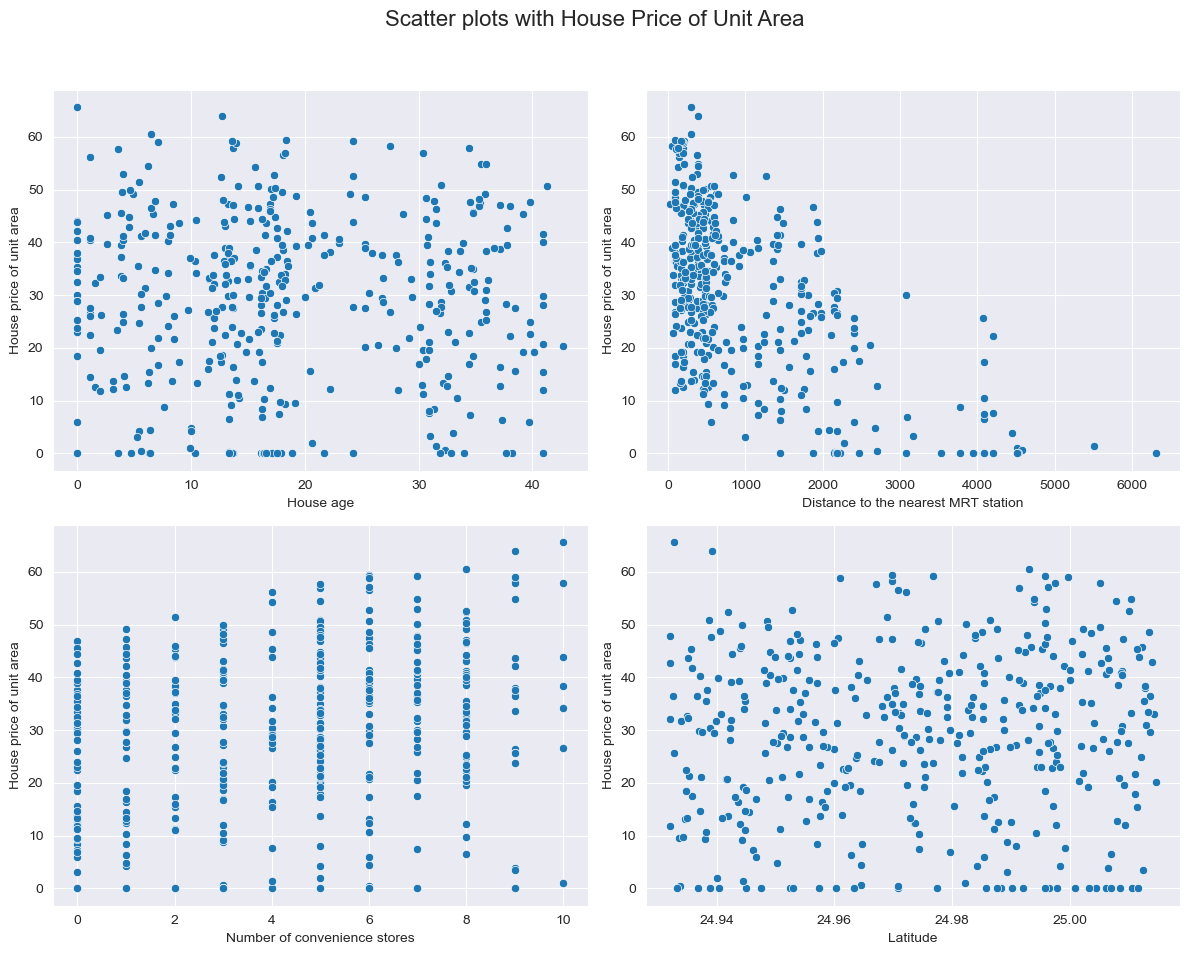

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
fig.suptitle('Scatter plots with House Price of Unit Area', fontsize=16)

#scatter plot for each varaible against the house price
sns.scatterplot(data=real_estate_data, x='House age', y = 'House price of unit area', ax=axes[0,0])
sns.scatterplot(data=real_estate_data, x= 'Distance to the nearest MRT station', y='House price of unit area', ax=axes[0,1])
sns.scatterplot(data=real_estate_data, x='Number of convenience stores', y='House price of unit area', ax=axes[1,0])
sns.scatterplot(data=real_estate_data, x='Latitude', y='House price of unit area', ax=axes[1,1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Interesting relationships between various factors and house price revealed by the scatterplots above
1. House Age vs House price - There does not seem to be a strong linear relationship between house age and price. How ever it appears that very new and very old houses might have higher prices. 
2. Distance to the nearest MRT station vs House price - There is a clear trend showing that as the distance to the nearest MRT station increases, the house price tends to decrease. It suggests a strong negative realtionshop between these two variables. 
3. Number of convenience store vs House price - There seems to be a positive relationship between the number of convenience stores and house prices. Houses with more conveneince stores in the vicinity tend to have higher prices. 
4. Latitude vs House price - There is no strong liner realtionship, however there seems to be a pattern where certain latotudes correspond to higher or lower house prices which could be suggesting that certain neighborhoods are more desirable. 

### Performing correlation analysis to quantify th realtionships between the variables against the house price

/var/folders/s3/5qv1zj6j4rb1_gv284qz_mh40000gn/T/ipykernel_14393/910163617.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = real_estate_data.corr()


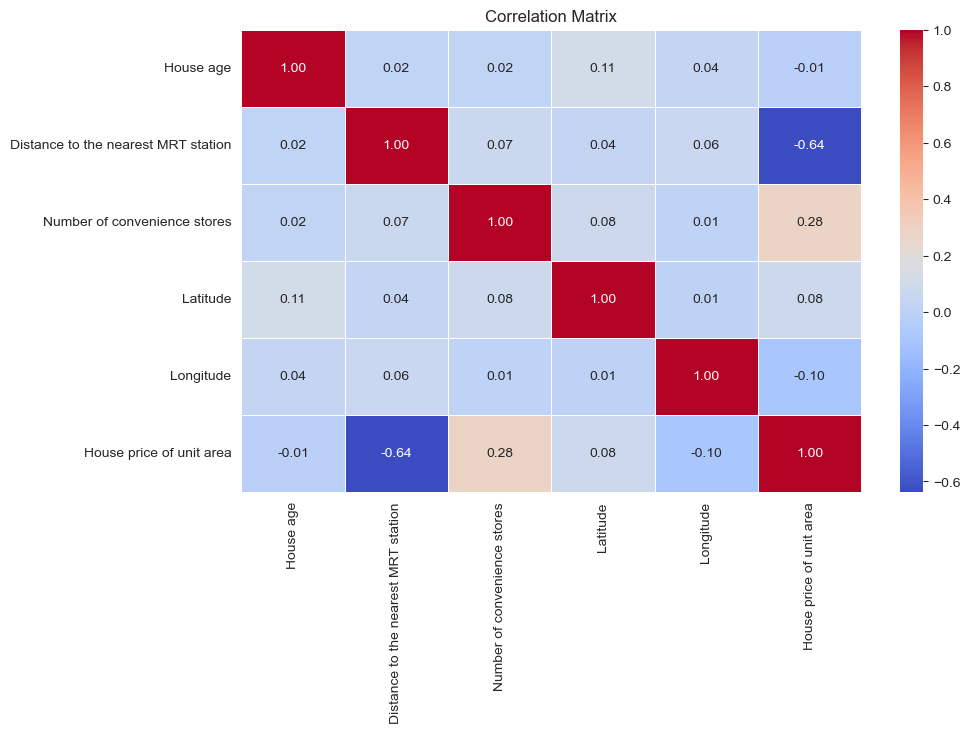

                                     House age  \
House age                             1.000000   
Distance to the nearest MRT station   0.021596   
Number of convenience stores          0.021973   
Latitude                              0.114345   
Longitude                             0.036449   
House price of unit area             -0.012284   

                                     Distance to the nearest MRT station  \
House age                                                       0.021596   
Distance to the nearest MRT station                             1.000000   
Number of convenience stores                                    0.069015   
Latitude                                                        0.038954   
Longitude                                                       0.064229   
House price of unit area                                       -0.636579   

                                     Number of convenience stores  Latitude  \
House age                            

In [7]:
# Correlation matrix
correlation_matrix = real_estate_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)


### Insights gained from correlation matrix
1. House age - This shows a very weak negative correlation with house price (-0.012) implying that age is not a strong predictor of price in this dataset
2. Distance to Nearest MRT station - Has a strong negative correlation with house price (-0.637). It indicates that properties closer to MRT stations tend to have higher prices which is a significant factor in property evaluation
3. Number of convenience stores - Displays a moderate positive correlation with house price (0.281). More convenience stores in the vicinity seem to positively affect property prices. 
4. Latitude and Longitude - Both show a wak correlation with house prices. Latitude has a slight positive correlation (0.081), while longitude has a slight negative correlation (-0.099). 

 Overall the most significant factors affecting house prices in this dataset appear to be the "proximity to MRT stations" and the "number of convenience stores" nearby. The geographical location (latitude and longitude) and the age of the house seem to have less impact on the price. 

#### Building a regression model to predict the real estate price by using the Linear Regression algorithm

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#selecting features and target variable
features = ['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target= 'House price of unit area'

X = real_estate_data[features]
y = real_estate_data[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Model Initialization
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)


LinearRegression()

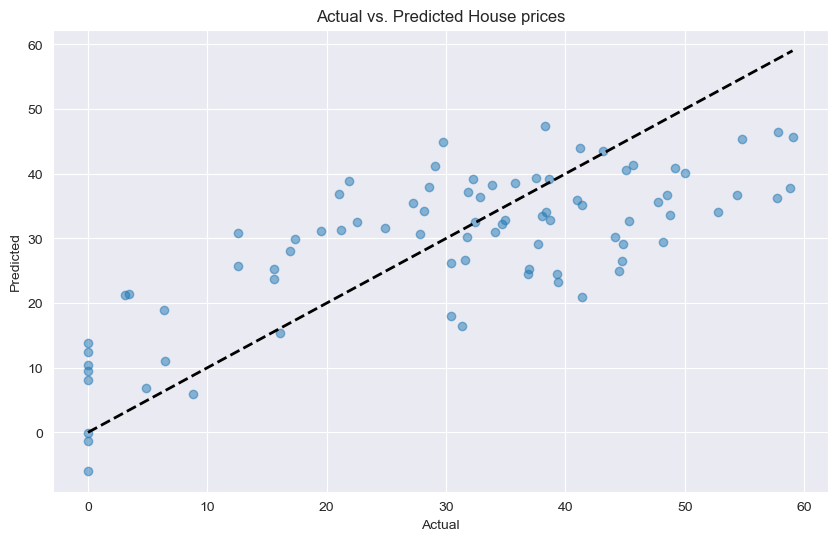

In [9]:
# making predictions using the linear regression model
y_pred_lr = model.predict(X_test)

# Visualization: Actual vs, Predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House prices')
plt.show()

#### Creating end to end solution for our machine leraning model by using the dash framework. 

In [10]:
import dash
from dash import html, dcc, Input, Output, State
import pandas as pd

# Initialize the dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.Div([
        html.H1("Real Estate Price Prediction", style={'text-align' : 'center'}),
        
        html.Div([
            dcc.Input(id='distance_to_mrt', type='number', placeholder='Distance to MRT Station (meters)',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='num_convenience_stores', type='number', placeholder='Number of Convenience Stores',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='latitude', type='number', placeholder='Latitude',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='longitude', type='number', placeholder='Longitude',
                      style={'margin': '10px', 'padding': '10px'}),
            html.Button('Predict Price', id='predict_button', n_clicks=0,
                        style={'margin': '10px', 'padding': '10px', 'background-color': '#007BFF', 'color': 'white'}),
        ], style={'text-align': 'center'}),
        
        html.Div(id='prediction_output', style={'text-align': 'center', 'font-size': '20px', 'margin-top': '20px'})
    ], style={'width': '50%', 'margin': '0 auto', 'border': '2px solid #007BFF', 'padding': '20px', 'border-radius': '10px'})
])

# Placeholder model function for demonstration
def predict_price(features):
    # Replace this with your actual model prediction logic
    return features.sum(axis=1)

# Define callback to update output
@app.callback(
    Output('prediction_output', 'children'),
    [Input('predict_button', 'n_clicks')],
    [State('distance_to_mrt', 'value'), 
     State('num_convenience_stores', 'value'),
     State('latitude', 'value'),
     State('longitude', 'value')]
)
def update_output(n_clicks, distance_to_mrt, num_convenience_stores, latitude, longitude):
    if n_clicks > 0 and all(v is not None for v in [distance_to_mrt, num_convenience_stores, latitude, longitude]):
        # Prepare the feature vector
        features = pd.DataFrame([[distance_to_mrt, num_convenience_stores, latitude, longitude]], 
                                columns=['distance_to_mrt', 'num_convenience_stores', 'latitude', 'longitude'])
        # Predict using the model
        prediction = predict_price(features)[0]
        return f'Predicted House Price of Unit Area: {prediction:.2f}'
    elif n_clicks > 0:
        return 'Please enter all values to get a prediction'
    return ''

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


### Summary 
Real estate Price Prediction is the process of estimating or forecasting the future prices of real estate properties, such as houses, apartments, or commercial buildings. The goal is to provide accurate property rates to buyers, sellers, investors, and real estate professionals to make informed decisions about real estate transactions. We collected, preprocessed dataset, did statistical analysis, developed model and finally created a basic Dash Web application for predicting real estate prices based on input features distance to the nearest MRT station, number of convenience stores nearby, latitude, and longitude. 